<a href="https://colab.research.google.com/github/MedhaParhy/EmotionDetection/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('gdrive/My Drive/icml_face_data.csv')
data.columns = ['emotion', 'Usage', 'pixel']
data.head()

,emotion,Usage,pixel
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
emotion_map = {0:"angry", 1:"disgusted", 2:"fearful", 3:"happy", 4:"sad", 5:"surprised", 6:"neutral"}

In [ ]:
data['pixel'][2]

'231 212 156 164 174 138 161 173 182 200 106 38 39 74 138 161 164 179 190 201 210 216 220 224 222 218 216 213 217 220 220 218 217 212 174 160 162 160 139 135 137 131 94 56 36 44 27 16 229 175 148 173 154 151 171 172 183 101 23 25 67 127 164 170 171 182 199 212 219 220 224 226 226 226 226 226 227 227 228 225 221 217 202 174 158 155 145 126 126 129 99 70 37 27 35 27 214 156 157 168 153 172 168 175 100 16 8 47 117 169 175 175 183 194 204 214 218 223 225 227 228 226 229 231 232 232 229 227 225 224 217 198 174 154 134 110 97 115 96 69 52 28 22 28 202 153 166 156 164 166 170 116 26 2 21 90 165 180 180 181 192 206 210 213 216 220 224 224 226 224 228 227 227 228 231 229 225 228 226 218 196 168 148 111 80 89 97 56 50 38 26 23 190 163 167 156 168 172 136 36 0 24 69 146 180 179 183 196 204 211 214 215 214 217 218 217 220 223 220 220 222 224 227 229 228 228 228 227 216 187 156 125 92 62 83 61 44 46 31 31 181 173 156 167 176 159 61 0 8 62 121 175 185 188 197 210 215 222 225 221 216 214 214 214 213 

In [ ]:
len(data['pixel'][2].split(' '))

2304

In [ ]:
math.sqrt(len(data['pixel'][2].split(' ')))

48.0

In [ ]:
narray = np.fromstring(data['pixel'][2], dtype = np.uint8, sep = ' ')
narray = narray.reshape(48, 48)

In [ ]:
narray.shape

(48, 48)

fearful


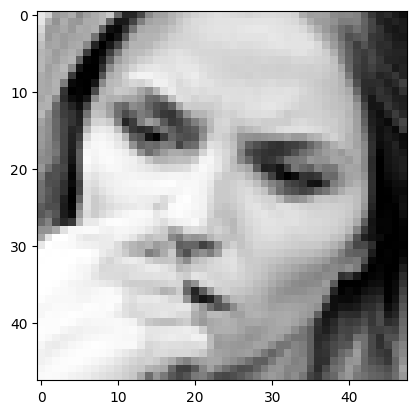

In [ ]:
plt.imshow(narray, cmap='gray')
print(emotion_map[data['emotion'][2]])

In [ ]:
def plot_image(index):
  narray = np.fromstring(data['pixel'][index], dtype = np.uint8, sep = ' ')
  narray = narray.reshape(48, 48)
  plt.imshow(narray, cmap='gray')
  plt.xlabel(emotion_map[data['emotion'][index]])
  #print(emotion_map[data['emotion'][index]])

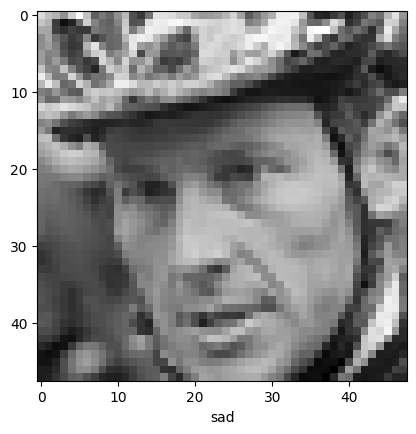

In [ ]:
plot_image(19)

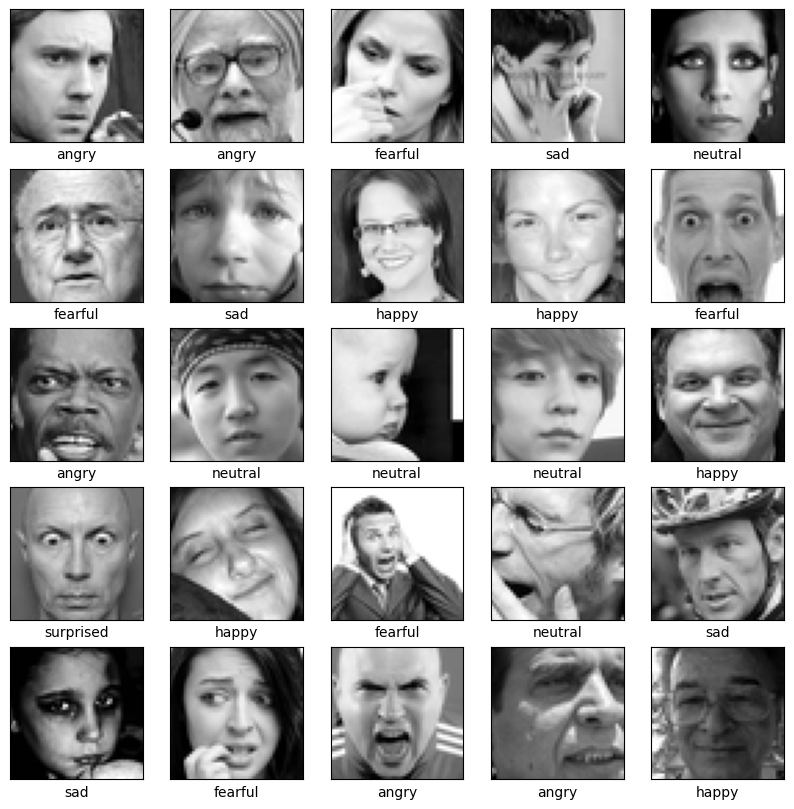

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plot_image(i)
plt.show()

In [ ]:
image_array = data['pixel'].apply(lambda x: np.fromstring(x, dtype = np.uint8, sep = ' ').reshape(48,48, 1))
image_array = np.stack(image_array, axis=0)

In [ ]:
image_array.shape

(35887, 48, 48, 1)

In [ ]:
data['emotion'].shape

(35887,)

In [ ]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, data['emotion'], test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train = X_train/255.0
X_test = X_test/255.0

(28709, 48, 48, 1)
(7178, 48, 48, 1)
(28709,)
(7178,)


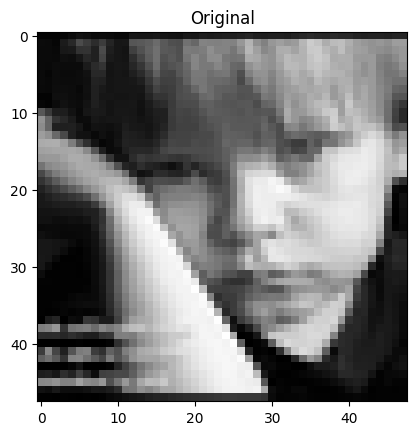

In [ ]:
#Testing convolutional layers
image = X_train[0]
plt.imshow(image, cmap='gray')
plt.title('Original')
image = tf.expand_dims(image, axis=0)

TensorShape([1, 46, 46, 1])

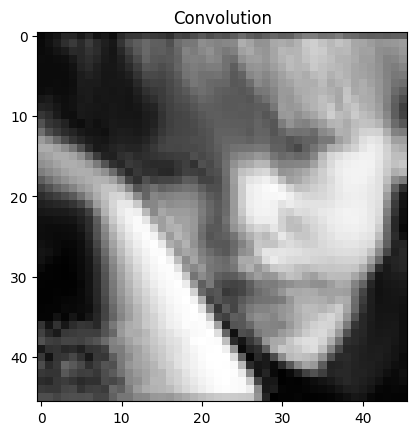

In [ ]:
cnn = Conv2D(1, (3, 3), activation='relu')
conv = cnn(image)
plt.imshow(tf.squeeze(conv), cmap='gray')
plt.title('Convolution')
conv.shape

Text(0.5, 1.0, 'Pooling')

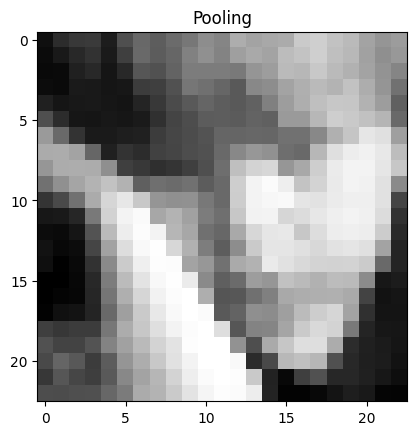

In [ ]:
pool = MaxPooling2D((2, 2), strides = 2)
pimage = pool(conv)
plt.imshow(tf.squeeze(pimage), cmap='gray')
plt.title('Pooling')

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 4, 4, 128)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
batch_size = 64
epochs = 20

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train)
model.fit(X_train, y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/20
449/449 [==============================] - 113s 246ms/step - loss: 1.6671 - accuracy: 0.3384
Epoch 2/20
449/449 [==============================] - 102s 228ms/step - loss: 1.4086 - accuracy: 0.4633
Epoch 3/20
449/449 [==============================] - 102s 227ms/step - loss: 1.2872 - accuracy: 0.5111
Epoch 4/20
449/449 [==============================] - 100s 223ms/step - loss: 1.2122 - accuracy: 0.5424
Epoch 5/20
449/449 [==============================] - 102s 228ms/step - loss: 1.1507 - accuracy: 0.5683
Epoch 6/20
449/449 [==============================] - 101s 224ms/step - loss: 1.0972 - accuracy: 0.5860
Epoch 7/20
449/449 [==============================] - 104s 233ms/step - loss: 1.0471 - accuracy: 0.6086
Epoch 8/20
449/449 [==============================] - 102s 228ms/step - loss: 1.0036 - accuracy: 0.6240
Epoch 9/20
449/449 [==============================] - 100s 223ms/step - loss: 0.9561 - accuracy: 0.6430
Epoch 10/20
449/449 [==============================] - 100s 224m

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

FileNotFoundError: [Errno 2] No such file or directory: 'emotiondetector.json'

https://medium.com/@pheonixdiaz625/real-time-facial-emotion-recognition-using-deep-learning-and-opencv-30a331d39cf1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
from tensorflow.keras.utils import to_categorical
y_test_onehot = to_categorical(y_test)
test_loss, test_acc = model.evaluate(X_test,  y_test_onehot, verbose=2)
print('\nTest accuracy:', test_acc)

225/225 - 8s - loss: 1.6057 - accuracy: 0.5536 - 8s/epoch - 35ms/step

Test accuracy: 0.5536361336708069


1/1 [==============================] - 0s 61ms/step
neutral
sad


Text(0.5, 1.0, 'Original')

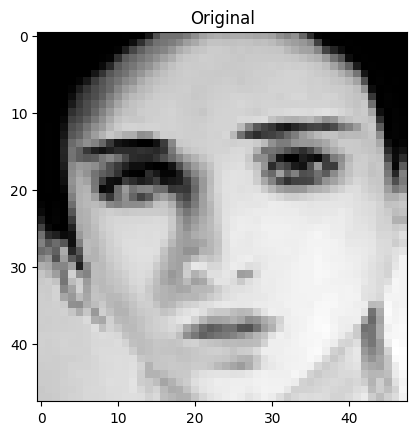

In [ ]:
image = X_test[3]
label = model.predict(image.reshape(1, 48, 48, 1))
print(emotion_map[np.argmax(label)])
print(emotion_map[y_test.iloc[3]])
plt.imshow(image, cmap='gray')
plt.title('Original')